## Import libraries

In [1]:
#Import pandas for data manipulation (tables, cleaning, joins, etc.)
import pandas as pd
#Import numpy for numerical operations
import numpy as np
#Import matplotlib for plots/visualizations
import matplotlib.pyplot as plt
#Import seaborn for statistical visualizations (heatmap, boxplot)
import seaborn as sns 

In [2]:
# read the CSV file into a DataFrame
df = pd.read_csv("DengueRisk_[outlier capped].csv")

In [3]:
display(df.head())
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))

,YearWeek,District,WeekStartDate,WeekEndDate,Cases,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,...,District_matale,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya
0,2022-W01,ampara,2022-01-03,2022-01-09,8,24.4860,28.9,21.7,50.8,57.412933,...,0,0,0,0,0,0,0,0,0,0
1,2022-W01,anuradhapura,2022-01-03,2022-01-09,12,24.9710,29.9,21.9,14.1,71.004908,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,badulla,2022-01-03,2022-01-09,64,21.6495,24.9,18.0,78.1,49.882597,...,0,0,0,0,0,0,0,0,0,0
3,2022-W01,batticaloa,2022-01-03,2022-01-09,26,25.3140,28.2,23.1,67.1,65.861631,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,colombo,2022-01-03,2022-01-09,563,26.2140,32.0,22.8,27.9,68.098525,...,0,0,0,0,0,0,0,0,0,0


Shape: (4366, 38)

Columns: ['YearWeek', 'District', 'WeekStartDate', 'WeekEndDate', 'Cases', 'temp_mean_C', 'temp_max_C', 'temp_min_C', 'rain_sum', 'sunshine_duration', 'daylight_duration', 'wind_speed_max', 'et0_evapotranspiration', 'District_anuradhapura', 'District_badulla', 'District_batticaloa', 'District_colombo', 'District_galle', 'District_gampaha', 'District_hambantota', 'District_jaffna', 'District_kalmunai', 'District_kalutara', 'District_kandy', 'District_kegalle', 'District_kilinochchi', 'District_kurunegala', 'District_mannar', 'District_matale', 'District_matara', 'District_monaragala', 'District_mullaitivu', 'District_nuwara eliya', 'District_polonnaruwa', 'District_puttalam', 'District_ratnapura', 'District_trincomalee', 'District_vavuniya']


## Feature Engineering:add risk_level

In [4]:
# District-wise 75th percentile rule on RAW Cases
df["risk_level"] = df.groupby("District")["Cases"].transform(
    lambda s: (s >= s.quantile(0.75)).astype(int)
)

# Quick check
display(df[["District","Cases","risk_level"]].head())
print("risk_level counts:\n", df["risk_level"].value_counts())

,District,Cases,risk_level
0,ampara,8,1
1,anuradhapura,12,0
2,badulla,64,1
3,batticaloa,26,0
4,colombo,563,1


risk_level counts:
 risk_level
0    3183
1    1183
Name: count, dtype: int64


In [5]:
display(df.head())

,YearWeek,District,WeekStartDate,WeekEndDate,Cases,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,...,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya,risk_level
0,2022-W01,ampara,2022-01-03,2022-01-09,8,24.4860,28.9,21.7,50.8,57.412933,...,0,0,0,0,0,0,0,0,0,1
1,2022-W01,anuradhapura,2022-01-03,2022-01-09,12,24.9710,29.9,21.9,14.1,71.004908,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,badulla,2022-01-03,2022-01-09,64,21.6495,24.9,18.0,78.1,49.882597,...,0,0,0,0,0,0,0,0,0,1
3,2022-W01,batticaloa,2022-01-03,2022-01-09,26,25.3140,28.2,23.1,67.1,65.861631,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,colombo,2022-01-03,2022-01-09,563,26.2140,32.0,22.8,27.9,68.098525,...,0,0,0,0,0,0,0,0,0,1


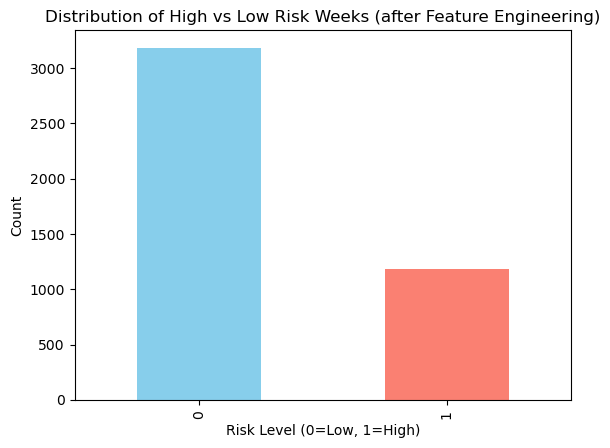

In [6]:
# Distribution of new label
import matplotlib.pyplot as plt
df["risk_level"].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Distribution of High vs Low Risk Weeks (after Feature Engineering)")
plt.xlabel("Risk Level (0=Low, 1=High)")
plt.ylabel("Count")
plt.show()

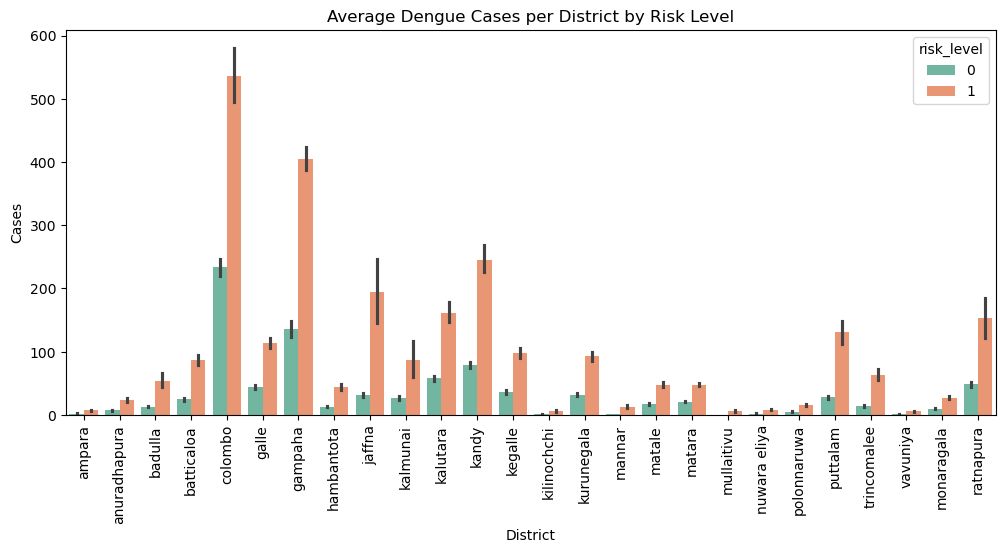

In [7]:
# Average cases per district by risk_level
plt.figure(figsize=(12,5))
sns.barplot(x="District", y="Cases", hue="risk_level", data=df, estimator="mean", palette="Set2")
plt.title("Average Dengue Cases per District by Risk Level")
plt.xticks(rotation=90)
plt.show()

## Feature Selection: Drop Coulumns

In [8]:
# Drop irrelevant identifier/date columns
cols_to_drop = ["District", "WeekStartDate", "WeekEndDate", "Cases"]
df = df.drop(columns=cols_to_drop, errors="ignore")

print("Remaining columns:\n", df.columns.tolist())


Remaining columns:
 ['YearWeek', 'temp_mean_C', 'temp_max_C', 'temp_min_C', 'rain_sum', 'sunshine_duration', 'daylight_duration', 'wind_speed_max', 'et0_evapotranspiration', 'District_anuradhapura', 'District_badulla', 'District_batticaloa', 'District_colombo', 'District_galle', 'District_gampaha', 'District_hambantota', 'District_jaffna', 'District_kalmunai', 'District_kalutara', 'District_kandy', 'District_kegalle', 'District_kilinochchi', 'District_kurunegala', 'District_mannar', 'District_matale', 'District_matara', 'District_monaragala', 'District_mullaitivu', 'District_nuwara eliya', 'District_polonnaruwa', 'District_puttalam', 'District_ratnapura', 'District_trincomalee', 'District_vavuniya', 'risk_level']


In [9]:
display(df.head())

,YearWeek,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,daylight_duration,wind_speed_max,et0_evapotranspiration,District_anuradhapura,...,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya,risk_level
0,2022-W01,24.4860,28.9,21.7,50.8,57.412933,82.023047,21.4,19.92,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-W01,24.9710,29.9,21.9,14.1,71.004908,81.609964,20.4,24.22,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,21.6495,24.9,18.0,78.1,49.882597,82.132894,14.5,16.71,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-W01,25.3140,28.2,23.1,67.1,65.861631,81.858042,23.6,21.62,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,26.2140,32.0,22.8,27.9,68.098525,82.160333,22.6,29.46,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df.to_csv('DengueRisk_[after_FeatureEngineering&Selecting].csv', index=False)